# Hand Written Digit Recognition

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## Loading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_test = X_train / 255, X_test / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Seeing Images

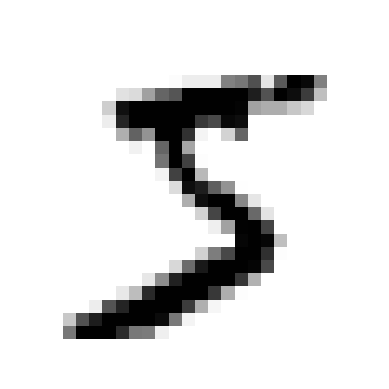

In [3]:
plt.imshow(X_train[0], cmap= 'binary')
plt.axis('off')
plt.show()

In [4]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

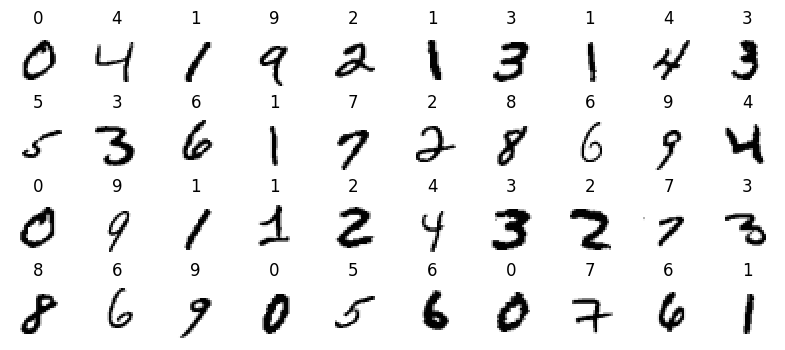

In [7]:
n_rows: int = 4
n_cols: int = 10
plt.figure(figsize= (n_cols, n_rows))

for row in range(n_rows):
    for col in range(n_cols):
        index: int = n_cols * row + col + 1
        plt.subplot(n_rows, n_cols, index)
        plt.imshow(X_train[index], cmap= 'binary', interpolation= 'nearest')
        plt.axis('off')
        plt.title(y_train[index])
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## CNN

In [8]:
tf.random.set_seed(42)

In [9]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    '/kaggle/working/logs', 
    profile_batch= (100, 200), 
    histogram_freq= 1
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience= 5, 
    restore_best_weights= True
)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    'my_checkpoints.weights.h5', 
    save_weights_only= True,
    save_best_only= True
)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape= (28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

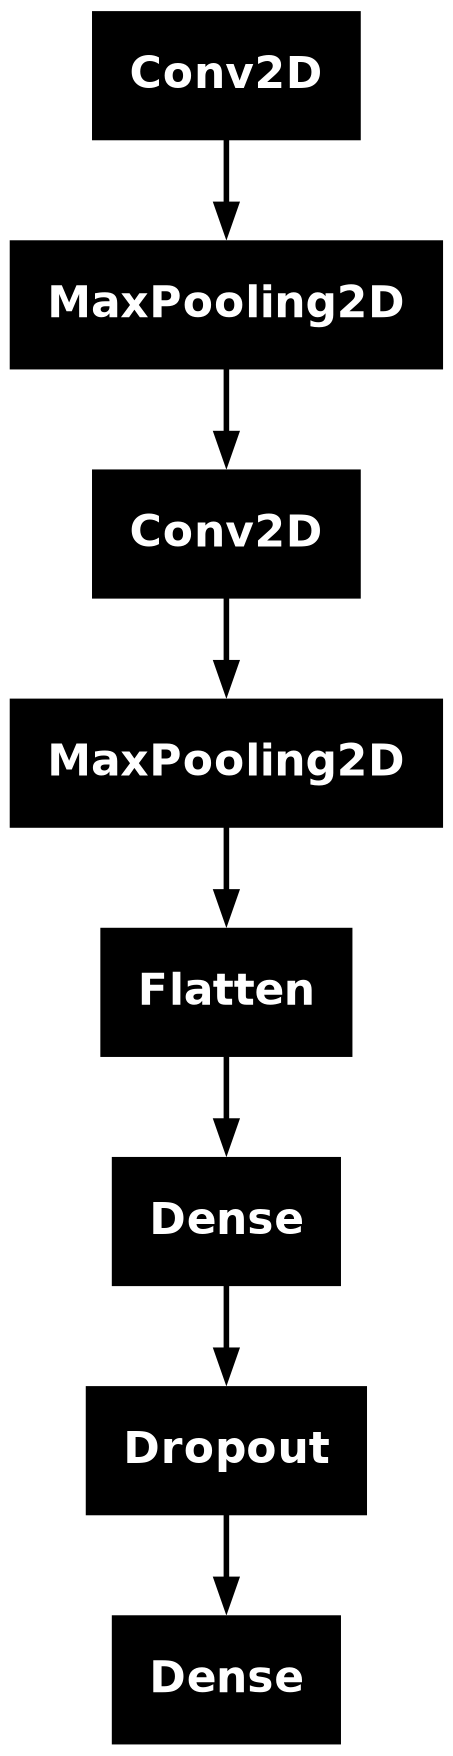

In [12]:
tf.keras.utils.plot_model(model)

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    X_train, 
    y_train,
    epochs= 50,
    validation_split= 0.1,
    callbacks= [tensorboard_cb, early_stopping, checkpoint_cb]
)

Epoch 1/50


I0000 00:00:1731861751.084978      98 service.cc:145] XLA service 0x7ae9e00050a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731861751.085023      98 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1731861754.279135      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8875 - loss: 0.3624 - val_accuracy: 0.9867 - val_loss: 0.0470
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0619 - val_accuracy: 0.9893 - val_loss: 0.0391
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0422 - val_accuracy: 0.9902 - val_loss: 0.0371
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9905 - val_loss: 0.0329
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9910 - val_loss: 0.0392
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9927 - val_loss: 0.0343
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9927 - val_loss: 0.0341
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9946 - loss: 0.0158 - val_accura

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9884 - loss: 0.0333


In [16]:
print(f'{test_acc:.2%}')

99.11%


In [17]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis= 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


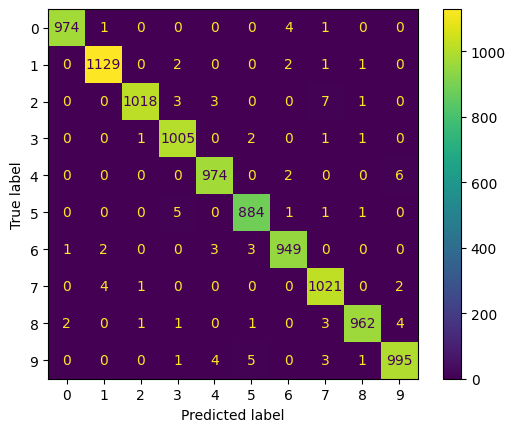

In [18]:
cm = confusion_matrix(y_test, y_pred_classes)

cmd = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= range(10))
cmd.plot()

In [19]:
model.save('/kaggle/working/handwritten_digit_rec.keras')

In [20]:
import subprocess

subprocess.run(["zip", "-r", "working_dir.zip", "/kaggle/working"], stdout= subprocess.DEVNULL)

CompletedProcess(args=['zip', '-r', 'working_dir.zip', '/kaggle/working'], returncode=0)